# 0. Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

# 1. Carga de datos

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 2. Preprocesamiento

##2.1 Typecasting binarios

In [ ]:
binary = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
          "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

In [ ]:
for c in binary:
    df[c].replace({"Yes": 1, "No": 0}, inplace=True)

df.head() # Viendo nueva forma de los datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [ ]:
df['Female'] = pd.get_dummies(df['Sex'])['Female']

In [ ]:
df.drop(columns='Sex', inplace=True)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female
0,0,16.60,1,0,0,3.0,30.0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,1
1,0,20.34,0,0,1,0.0,0.0,0,80 or older,White,No,1,Very good,7.0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,65-69,White,Yes,1,Fair,8.0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,75-79,White,No,0,Good,6.0,0,0,1,1
4,0,23.71,0,0,0,28.0,0.0,1,40-44,White,No,1,Very good,8.0,0,0,0,1


## 2.2 Typecasting categóricos

# 3. Prevalencia paro cardíaco según raza

In [ ]:
df.sort_values("Stroke", inplace=True, ascending=False)

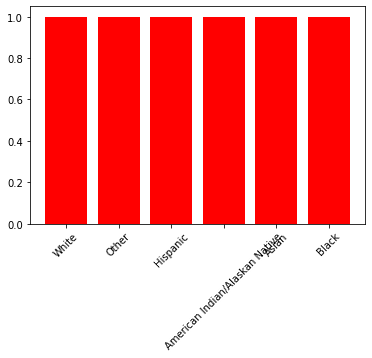

In [ ]:
plt.xticks(rotation=45)
stroke_race_bar = plt.bar(df['Race'], df['Stroke'],
        color = ['g' if c == 0 else 'r' for c in df['Stroke']])

# 4. Riesgo al corazón según diabetes

In [ ]:
sick = df[df['HeartDisease'] == 1]
sick.reset_index(inplace=True)
sick

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female
0,21693,1,27.55,0,0,1,0.0,0.0,0,70-74,Hispanic,No,0,Fair,8.0,0,0,0,0
1,47917,1,14.70,1,0,1,0.0,0.0,0,70-74,White,No,1,Good,7.0,0,1,1,1
2,47993,1,27.32,1,0,1,4.0,0.0,0,65-69,White,Yes,1,Good,7.0,0,0,1,0
3,47998,1,32.88,0,0,1,30.0,2.0,1,70-74,White,Yes,1,Good,7.0,0,0,1,1
4,4675,1,28.06,0,0,1,7.0,30.0,1,55-59,Other,No,0,Fair,4.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,52491,1,27.71,1,0,0,0.0,10.0,0,55-59,White,Yes,1,Good,6.0,0,0,0,0
4627,52494,1,29.53,1,0,0,15.0,15.0,0,70-74,White,No,1,Very good,8.0,0,0,1,1
4628,52522,1,35.51,1,0,0,5.0,4.0,0,60-64,White,Yes,1,Fair,7.0,0,0,0,0
4629,52521,1,22.46,0,0,0,10.0,12.0,0,70-74,White,No,1,Good,7.0,0,0,0,0


In [ ]:
sick_df = pd.DataFrame(sick['Diabetic'].value_counts())
sick_df.columns = ['Count']
sick_df['Diabetic'] = sick_df.index

In [ ]:
sick_df.reset_index(inplace=True)
sick_df

,index,Count,Diabetic
0,No,2942,No
1,Yes,1541,Yes
2,"No, borderline diabetes",130,"No, borderline diabetes"
3,Yes (during pregnancy),18,Yes (during pregnancy)


In [ ]:
heart_diabetes_pie = plt.pie(sick_df)